In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd /content/gdrive/'My Drive'/

/content/gdrive/My Drive


# **Лабораторная работа №3**

**Максимов Антон 17ПМИ**

In [0]:
df = pd.read_csv('quake.csv')

In [7]:
df

,Focal depth,Latitude,Longitude,Richter
0,33,-52.26,28.30,6.7
1,36,45.53,150.93,5.8
2,57,41.85,142.78,5.8
3,67,29.19,141.15,6.2
4,30,-21.66,169.81,6.0
...,...,...,...,...
2173,13,51.54,-173.11,5.8
2174,97,-10.16,161.01,5.9
2175,527,27.87,139.51,5.8
2176,51,36.43,140.98,6.0


In [0]:
data = df

In [10]:
data.describe()

,Focal depth,Latitude,Longitude,Richter
count,2178.000000,2178.000000,2178.000000,2178.000000
mean,74.359963,7.961997,54.914835,5.977181
std,116.467797,30.545583,118.875581,0.189426
min,0.000000,-66.490000,-179.960000,5.800000
25%,21.000000,-12.432500,-67.782500,5.800000
50%,39.000000,0.210000,122.100000,5.900000
75%,68.000000,36.480000,146.860000,6.100000
max,656.000000,78.150000,180.000000,6.900000


Заметим, что есть объекты с глубиной очага равной 0, однако это не является ошибкой или выбросом, они входят в класс землятрясений от 0 до 70 километров 

In [8]:
data[data['Focal depth']==0]

,Focal depth,Latitude,Longitude,Richter
5,0,23.09,120.58,6.2
15,0,-44.20,167.96,5.8
92,0,49.88,78.96,5.8
187,0,49.77,78.10,6.1
197,0,49.72,78.07,6.0
...,...,...,...,...
2114,0,49.85,78.87,6.1
2116,0,49.84,78.69,6.0
2120,0,49.92,78.80,6.0
2153,0,53.21,-166.92,5.8


##**Предобработка**

Проведем автошкалирование данных

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [0]:
data_array = np.asarray(data)

In [13]:
data_array[:,1]

array([-52.26,  45.53,  41.85, ...,  27.87,  36.43,  24.02])

##**Задание 1**

 Произвести кластеризацию данных. Необходимо использовать как минимум 3 из 4 алгоритмов: Иерархическая кластеризация, K-Means, EM, плотностной алгоритм (DBSCAN или HDBSCAN):
- Для иерархической попробовать различные расстояния между объектами и межкластерные расстояния

###**Иерархическая кластеризация**

**Используем различные метода для нахождения межкластерного расстояния и построим linkage матрицы. Для каждого метода построим дендрограммы. После получим id кластеров для каждого объекта и построим новые кластеры по дендрограммам используя разные критерии: 1) по расстоянию от начальных наблюдений 2) по кол-ву кластеров в дендрограмме** 

In [0]:
import scipy.cluster.hierarchy as ht

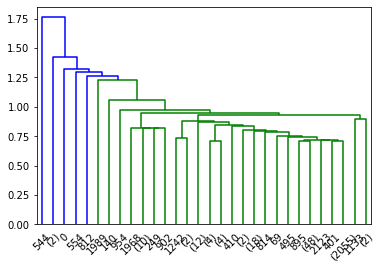

In [169]:
R1 = ht.linkage(scaled_data, method='single')
_ = ht.dendrogram(R1, truncate_mode='lastp')

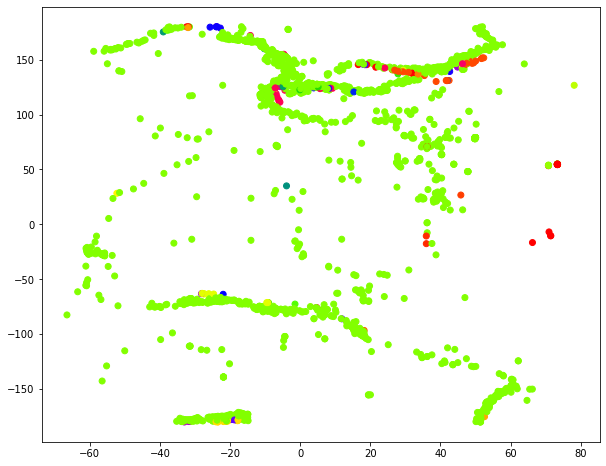

In [200]:
clusters = ht.fcluster(R1, t=0.6, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

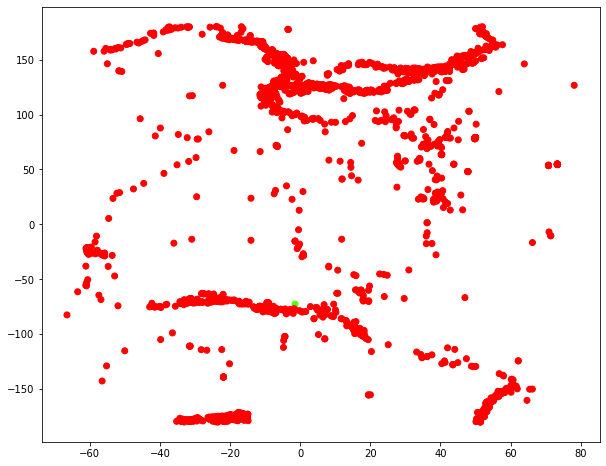

In [251]:
clusters = ht.fcluster(R1, 2, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

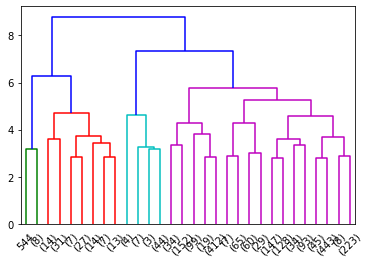

In [170]:
R2 = ht.linkage(scaled_data, method='complete')
_ = ht.dendrogram(R2, truncate_mode='lastp')

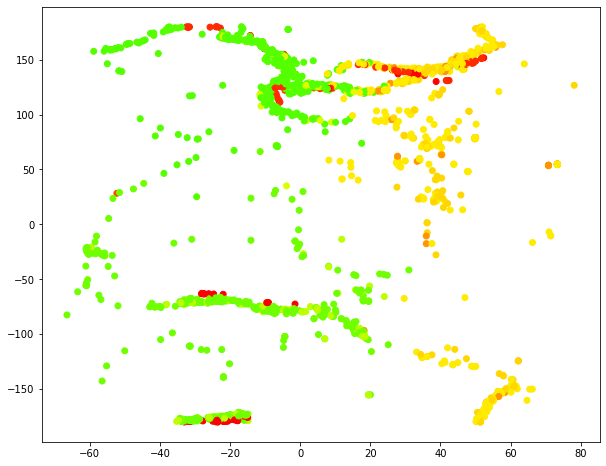

In [230]:
clusters = ht.fcluster(R2, t=4, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

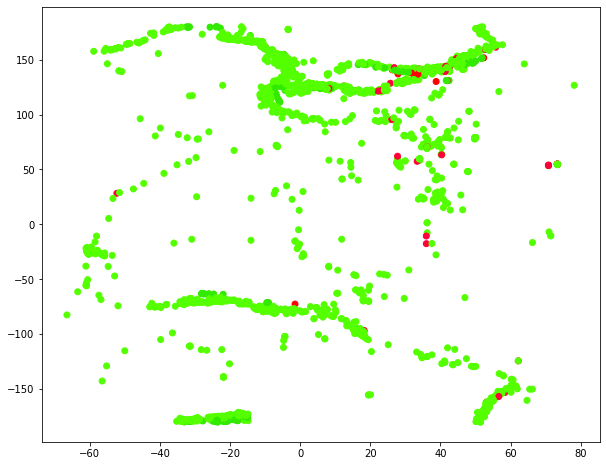

In [252]:
clusters = ht.fcluster(R2, 4, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

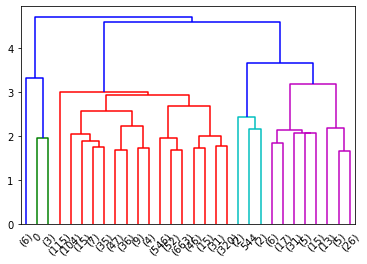

In [202]:
R3 = ht.linkage(scaled_data, method='average')
_ = ht.dendrogram(R3, truncate_mode='lastp')

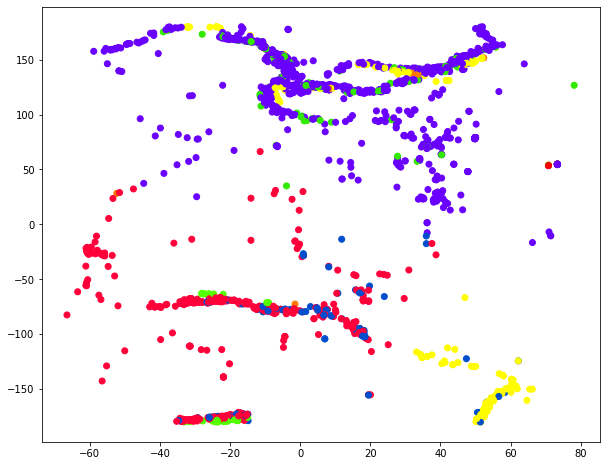

In [256]:
clusters = ht.fcluster(R3, t=2.5, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism') 
plt.show()

10

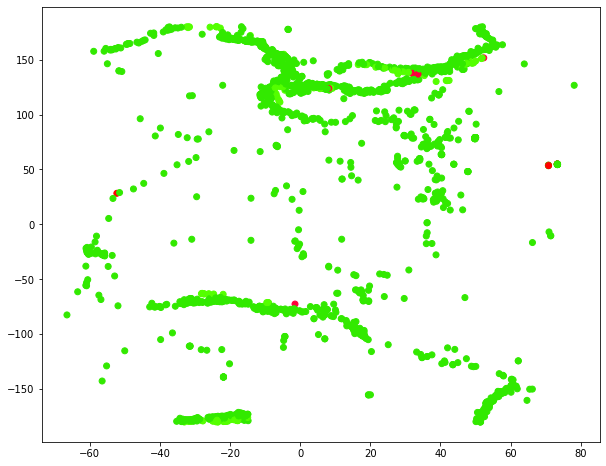

In [253]:
clusters = ht.fcluster(R3, 4, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

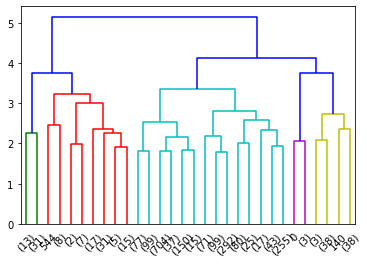

In [172]:
R4 = ht.linkage(scaled_data, method='weighted')
_ = ht.dendrogram(R4, truncate_mode='lastp')

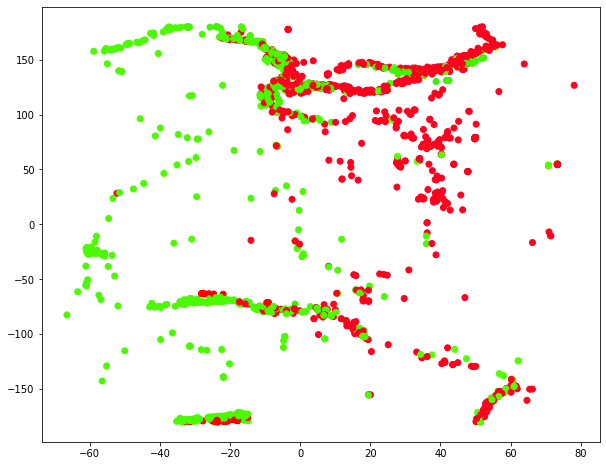

In [223]:
clusters = ht.fcluster(R4, t=3, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism') 

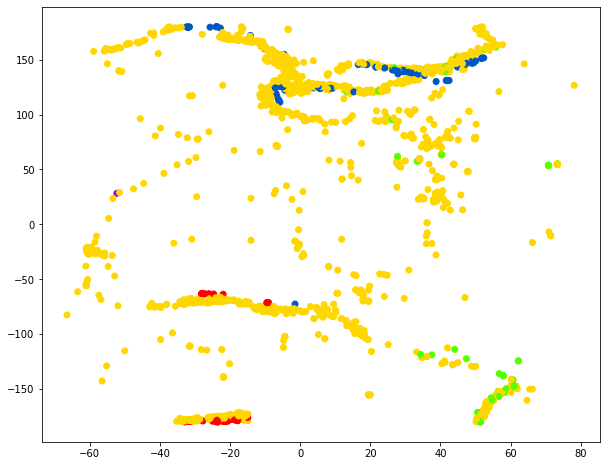

In [254]:
clusters = ht.fcluster(R4, 5, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism') 
plt.show()

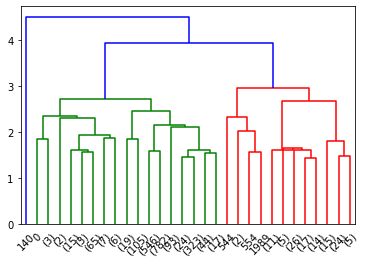

In [173]:
R5 = ht.linkage(scaled_data, method='centroid')
_ = ht.dendrogram(R5, truncate_mode='lastp')

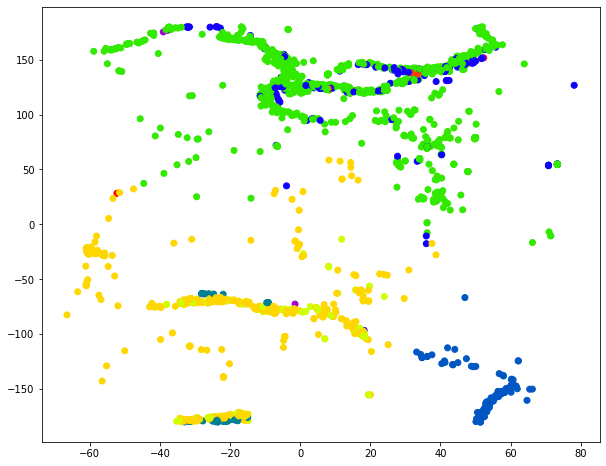

In [217]:
clusters = ht.fcluster(R5, t=2, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

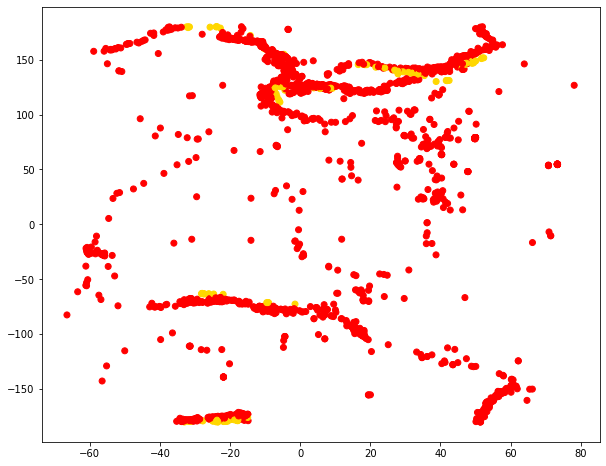

In [255]:
clusters = ht.fcluster(R5, 3, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

###**K-Means**

In [0]:
from sklearn.cluster import KMeans

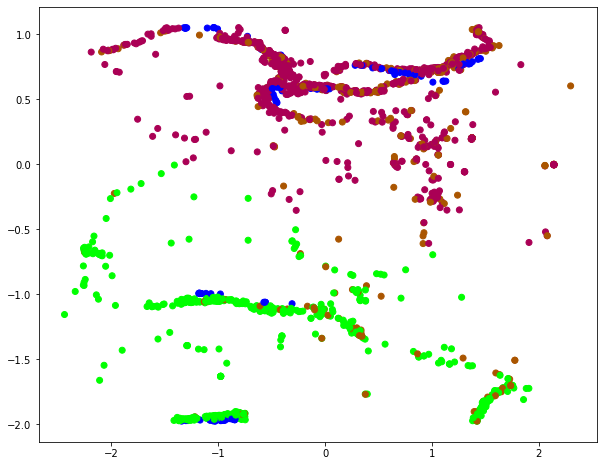

In [294]:
model = KMeans(n_clusters=4, n_init=10000, init='random', max_iter=30000)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.labels_, cmap='brg')
plt.show()

С этим же разделением относительно других признаков:

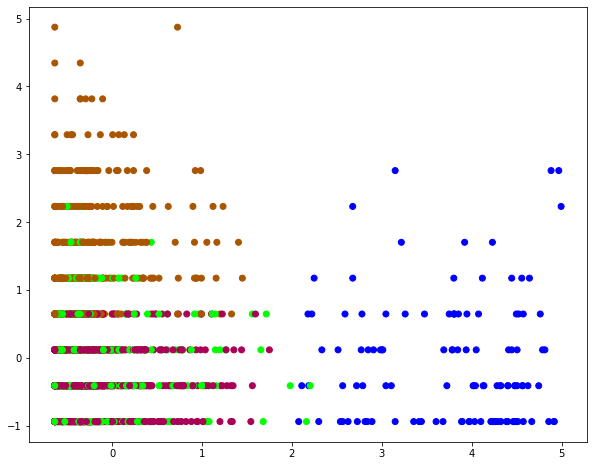

In [296]:
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,0], scaled_data[:,3], c=model.labels_, cmap='brg')
plt.show()

###**EM**

In [0]:
from sklearn.mixture import GaussianMixture

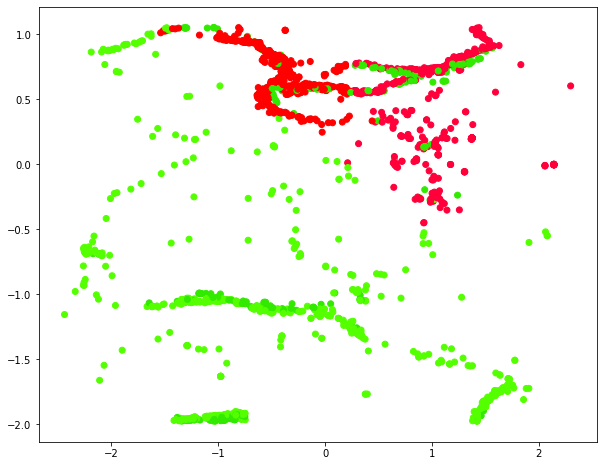

In [293]:
model = GaussianMixture(n_components=4, n_init=145)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.predict(scaled_data), cmap='prism')
plt.show()

###**DBSCAN**

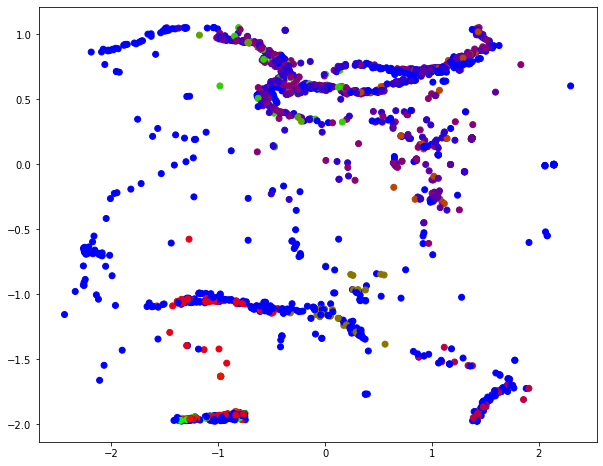

In [298]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5, min_samples=25)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.labels_, cmap='brg')
plt.show()

##**Задание 2**

 Для всех выбранных алгоритмов подобрать оптимальные параметры:
- Самый важный параметр - количество кластеров. Для DBSCAN  - соответственно радиус e и количество core ключевых точек (для HDBSCAN только core). Для оправдания вашего выбора использовать индексы качества кластеризации, каменистую осыпь, личные наблюдения за датасетом, а также визуализации результата кластеризации (нарисовав точки на плоскости и увидев, что полученная кластеризация работает довольно хорошо).

**Во всех алгоритмах будем опираться на визуализацию и использовать два индекса качества:**

In [0]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

###**Подбор параметров Иерархической кластеризации**

Визуально хорошо справился 3 пример кластеризации - его и возьмем для начала

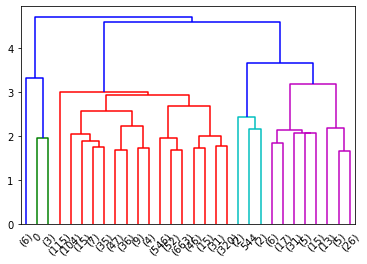

In [51]:
R3 = ht.linkage(scaled_data, method='average')
_ = ht.dendrogram(R3, truncate_mode='lastp')

In [0]:
clusters = ht.fcluster(R3, t=2.5, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(data_array[:,1], data_array[:,2], c=clusters, cmap='prism')  
plt.show()

Подберем параметр t

In [0]:
scores_sil = []
scores_davi = []
tt = []

for i in range(1,31):
  clusters = ht.fcluster(R1, t=i/10, criterion='distance')
  tt.append(i/10)
  print(i/10)
  scores_sil.append(silhouette_score(scaled_data, clusters))
  scores_davi.append(davies_bouldin_score(scaled_data, clusters))

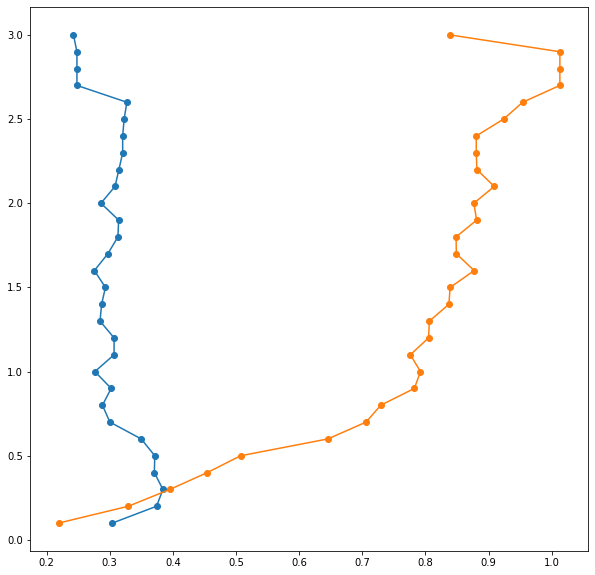

In [54]:
plt.figure(figsize=(10, 10))
plt.plot(scores_sil, tt)
plt.scatter(scores_sil, tt) 
plt.plot(scores_davi, tt)
plt.scatter(scores_davi, tt) 

**Лучший результат при t=0.3**

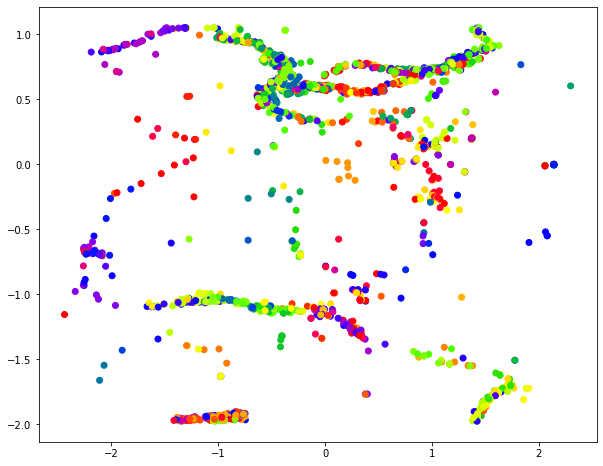

In [56]:
clusters = ht.fcluster(R3, t=0.3, criterion='distance')
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=clusters, cmap='prism')  
plt.show()

**Однако все хуже чем кажется на первый взгляд, при хороших результатах параметров и индексов качества появляется чересчур много кластеров**


###**Подбор параметров K-Means**

In [0]:
scores_sil = []
scores_davi = []
num_clusters = []

for i in range(2,30):
  model = KMeans(n_clusters=i, n_init=100, init='random', max_iter=300)
  model.fit(scaled_data)
  num_clusters.append(i)
  print(i)
  scores_sil.append(silhouette_score(scaled_data, model.predict(scaled_data)))
  scores_davi.append(davies_bouldin_score(scaled_data, model.predict(scaled_data)))

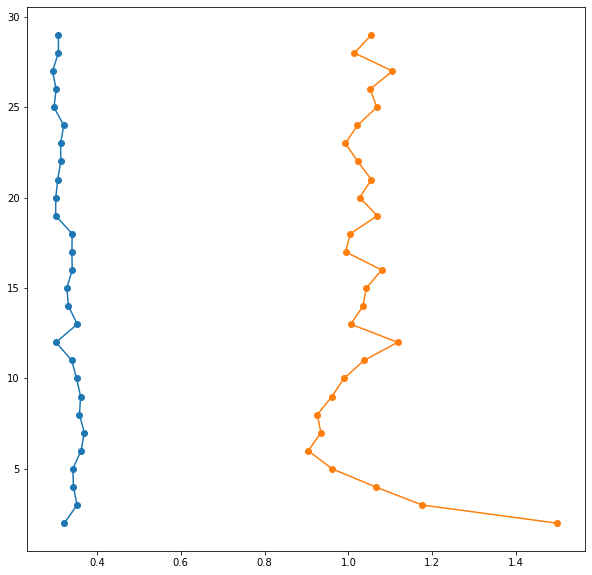

In [310]:
plt.figure(figsize=(10, 10))
plt.plot(scores_sil, num_clusters)
plt.scatter(scores_sil, num_clusters) 
plt.plot(scores_davi, num_clusters)
plt.scatter(scores_davi, num_clusters) 
  

**Чем больше индекс качества силуэта, тем лучше, у дэвиса наоборот**

**По графику видно, что оптимально нужно выбрать 6 кластеров**

In [0]:
scores_sil = []
scores_davi = []
num_clusters = []

for i in range(2,30):
  model = KMeans(n_clusters=i, n_init=1000, init='random', max_iter=3000)
  model.fit(scaled_data)
  num_clusters.append(i)
  print(i)
  scores_sil.append(silhouette_score(scaled_data, model.predict(scaled_data)))
  scores_davi.append(davies_bouldin_score(scaled_data, model.predict(scaled_data)))

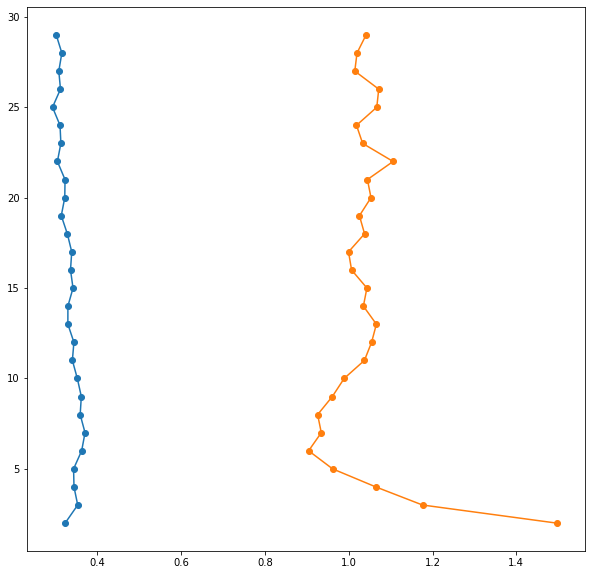

In [312]:
plt.figure(figsize=(10, 10))
plt.plot(scores_sil, num_clusters)
plt.scatter(scores_sil, num_clusters) 
plt.plot(scores_davi, num_clusters)
plt.scatter(scores_davi, num_clusters) 

**Изменение других параметров ничего особо не дает**

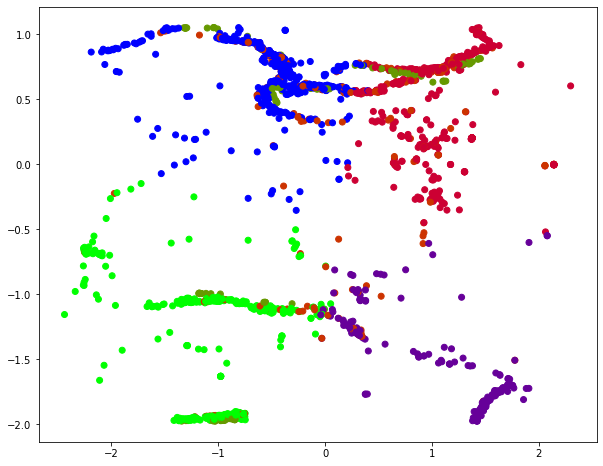

In [315]:
model = KMeans(n_clusters=6, n_init=100, init='random', max_iter=300)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.labels_, cmap='brg')
plt.show()

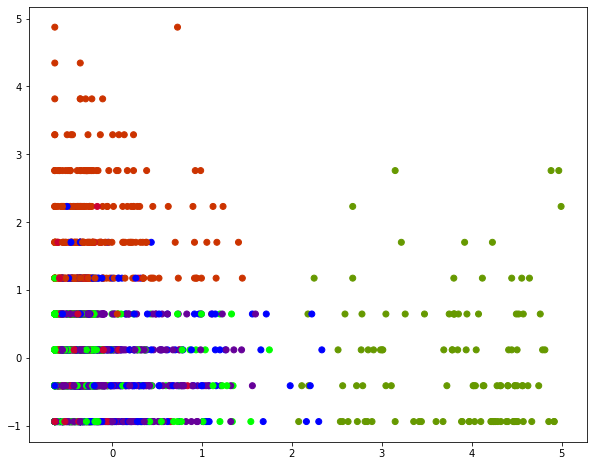

In [43]:
model = KMeans(n_clusters=6, n_init=100, init='random', max_iter=300)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,0], scaled_data[:,3], c=model.labels_, cmap='brg')
plt.show()

###**Подбор параметров EM**

In [0]:
model = GaussianMixture(n_components=4, n_init=145)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.predict(scaled_data), cmap='prism')
plt.show()

В качестве n_init=100 как и в K-Means

In [0]:
scores_sil = []
scores_davi = []
num_clusters = []

for i in range(2,30):
  model = GaussianMixture(n_components=i, n_init=100)
  model.fit(scaled_data)
  num_clusters.append(i)
  print(i)
  scores_sil.append(silhouette_score(scaled_data, model.predict(scaled_data)))
  scores_davi.append(davies_bouldin_score(scaled_data, model.predict(scaled_data)))

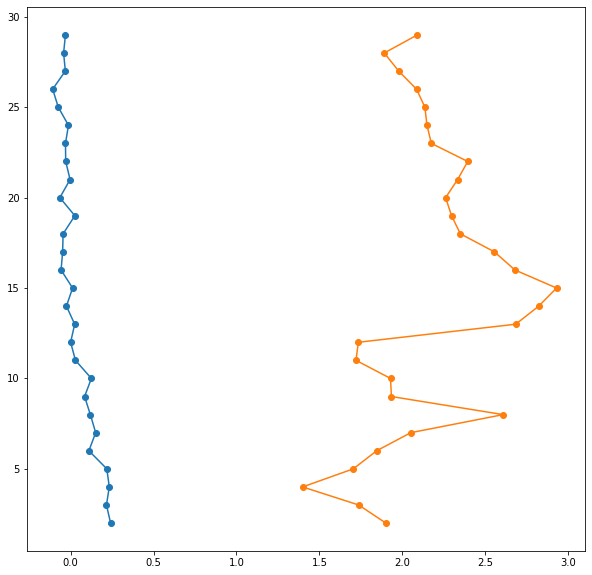

In [46]:
plt.figure(figsize=(10, 10))
plt.plot(scores_sil, num_clusters)
plt.scatter(scores_sil, num_clusters) 
plt.plot(scores_davi, num_clusters)
plt.scatter(scores_davi, num_clusters) 

Наилучший результат при 4-х кластерах

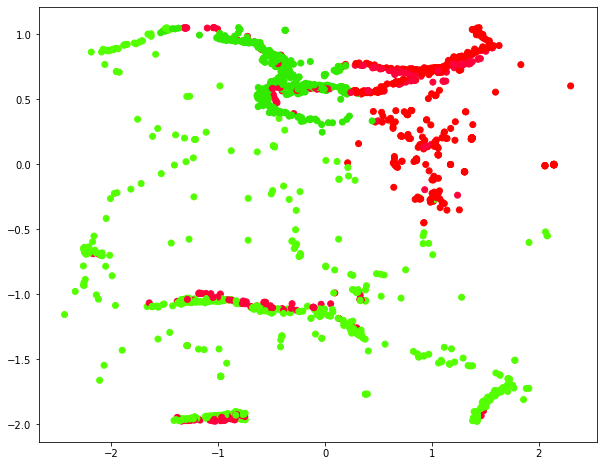

In [60]:
model = GaussianMixture(n_components=4, n_init=100)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.predict(scaled_data), cmap='prism')
plt.show()

###**Подбор параметров DBSCAN**

Так визуально данные расположены более менее плотно, для начала количсетво соседей поставим 3, при этом чем больше соседей мы ставим, тем меньше итераций мы можем сделать, вследствие очевидности кластера, то есть недостатка лэйблов

In [0]:
scores_sildb = []
scores_davidb = []
num_clustersdb = []

for i in range(1,18):
  model_db = DBSCAN(eps=i/10, min_samples=3)
  model_db.fit(scaled_data)
  num_clustersdb.append(i/10)
  print(i/10)
  scores_sildb.append(silhouette_score(scaled_data, model_db.labels_))
  scores_davidb.append(davies_bouldin_score(scaled_data, model_db.labels_))

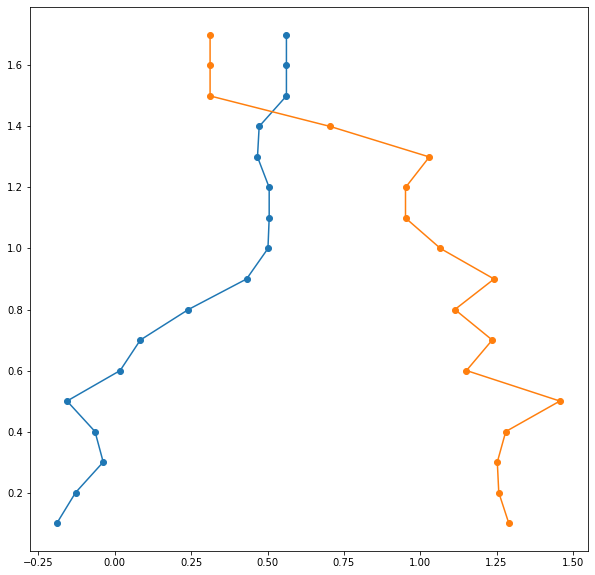

In [31]:
plt.figure(figsize=(10, 10))
plt.plot(scores_sildb, num_clustersdb)
plt.scatter(scores_sildb, num_clustersdb) 
plt.plot(scores_davidb, num_clustersdb)
plt.scatter(scores_davidb, num_clustersdb) 

**Было протестировано с разным количеством соседей и eps, но графики одни и те же, и eps = 1.4-1.5 c 3-8 соседями, однако при увеличении соседей ситация изменилась**

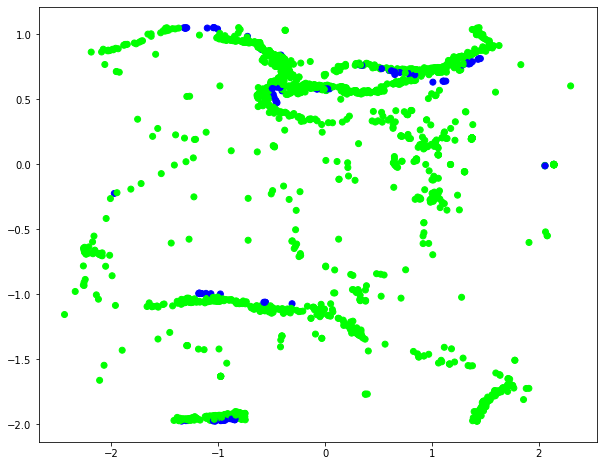

In [73]:
model = DBSCAN(eps=1.45, min_samples=50)
model.fit(scaled_data)
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data[:,1], scaled_data[:,2], c=model.labels_, cmap='brg')
plt.show()

In [0]:
scores_sildb = []
scores_davidb = []
num_clustersdb = []

for i in range(50,1000,50):
  model_db = DBSCAN(eps=1.45, min_samples=i)
  model_db.fit(scaled_data)
  num_clustersdb.append(i)
  print(i)
  scores_sildb.append(silhouette_score(scaled_data, model_db.labels_))
  scores_davidb.append(davies_bouldin_score(scaled_data, model_db.labels_))

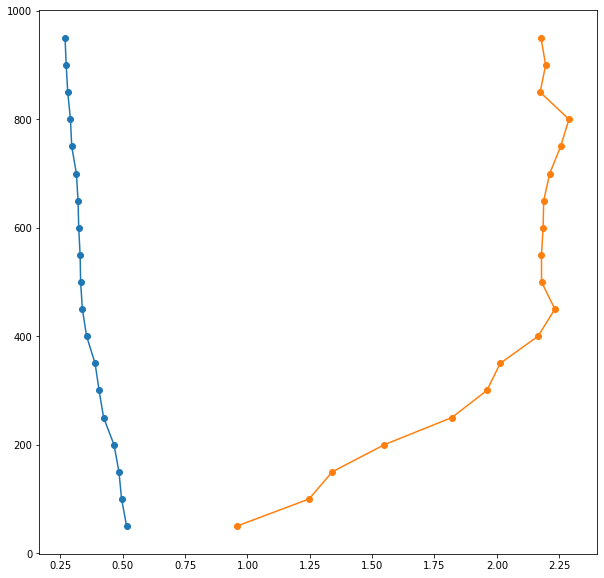

In [71]:
plt.figure(figsize=(10, 10))
plt.plot(scores_sildb, num_clustersdb)
plt.scatter(scores_sildb, num_clustersdb) 
plt.plot(scores_davidb, num_clustersdb)
plt.scatter(scores_davidb, num_clustersdb) 

##**Задание 3**

Сравнить алгоритмы (по скорости / качеству полученных кластеров) а также сами кластеризации между собой (Fowlkes-Mallows index).

In [0]:
from sklearn.metrics import fowlkes_mallows_score

Лучшие из лучших

In [0]:
import time
class Timer(object):
    def __enter__(self):
        self._startTime = time.time() 
    def __exit__(self, type, value, traceback):
        print("Прошло: {:.3f} sec".format(time.time() - self._startTime))

In [79]:
with Timer() as t:
  R3 = ht.linkage(scaled_data, method='average')
  clusters = ht.fcluster(R3, t=0.3, criterion='distance')

Прошло: 0.150 sec


In [19]:
with Timer() as t:
  model1 = KMeans(n_clusters=6, n_init=100, init='random', max_iter=300)
  model1.fit(scaled_data)

Прошло: 0.627 sec


In [90]:
with Timer() as t:
  model2 = GaussianMixture(n_components=4, n_init=100)
  model2.fit(scaled_data)

Прошло: 3.734 sec


In [20]:
with Timer() as t:
  model3 = DBSCAN(eps=1.45, min_samples=50)
  model3.fit(scaled_data)

Прошло: 0.108 sec


**Hierarchy and K-Means**

In [92]:
fowlkes_mallows_score(model1.labels_,clusters)

0.15104926375337463

**EM and K-Means**

In [94]:
fowlkes_mallows_score(model1.labels_,model2.predict(scaled_data))

0.663436105127995

**DBSCAN and K-Means**

In [95]:
fowlkes_mallows_score(model1.labels_,model3.labels_)

0.48242847691681534

**DBSCAN and EM**

In [96]:
fowlkes_mallows_score(model2.predict(scaled_data),model3.labels_)

0.5320691524376453

**Hierarchy and EM**

In [97]:
fowlkes_mallows_score(model2.predict(scaled_data),clusters)

0.13293072762490674

**Hierarchy and DBSCAN**

In [98]:
fowlkes_mallows_score(model3.labels_,clusters)

0.07370875973803195

In [100]:
print("Hierarchy:",silhouette_score(scaled_data,clusters))
print("K-Means:",silhouette_score(scaled_data,model1.labels_))
print("EM:",silhouette_score(scaled_data,model2.predict(scaled_data)))
print("DBSCAN:",silhouette_score(scaled_data,model3.labels_))

Hierarchy: 0.38423411654342676
K-Means: 0.36220509041701343
EM: 0.23305087138129138
DBSCAN: 0.5151542529926963


**Однако fowlkes mallows score у Hierarchy и DBSCAN практически 0, следовательно они кластеризовали по-разному в то время как у к-средних с dbscan хорошее значение**

##**Задание 4**

Дать описание проведённых вами манипуляций и полученный результат, сюда включается:
- интересные моменты в данных, если вы заметили что-то любопытное
- описание предобработки данных, если она есть, в том числе зачем было произведено то или иное действие
- выбранные алгоритмы для кластеризации; краткое пояснение, почему эти алгоритмы могут быть полезны
- описание подбора параметров для каждого алгоритма, оправдание выбора определённого числа кластеров (или некоторого интервала, например "100-500 кластеров оптимально, потому что..."). Оправданиями могут быть, дендрограммы иерархической кластеризации, индексы качества кластеризации, алгоритм каменистой осыпи, визуальное объяснение, объяснение на основе смысла данных... Вообщем, логика и знания :)

**Интересные моменты** 

Очевидно, что визуально по долготе и широте объекты можно разделить на 4 кластера, однако ни один алгоритм не дает эти 4 кластера, вследствие опоры на другие признаки

Слишком малый диапазон по шкале рихтера, на карте Объекты практически не будут различаться по размерам

**Предобработка**

В качестве препроцессинга данные были нормализованы и отцентрированы, чтобы алгоритмы кластеризации работали с более удобными для расчета данными

**Выбранные алгоритмы и их полезность**


Были выбраны : Иерархическая кластеризация, K-Means, EM и DBSCAN


Для каждого алгоритма параметры подбирались с помощью двух индексов качества кластеризации путем прохода по параметрам и визуализации. Также учитывалось как с этой кластеризацией уживались другие признаки.(Более подробно все описано выше)

**Самым быстрым оказался алгоритм DBSCAN, однако - всего 2 кластера, молниеносный,но ленивый**

**K-Means больше всего подошел для этого датасета , так как размерность признаков мала, для многоразмерных данных он бы не подошел**

**EM немного отстал от K-Means, но тоже неплохо справился**

**Hierarchy что-то сделал, но не понятно что, еще и создал много кластеров**

**Такие вот, результаты**

##**Задание 5**

Выбранная наилучшая кластеризация / пара кластеризаций (от разных алгоритмов) должны быть визуализированы на карте Земли с использованием широты и долготы в качестве координат. За дополнительное визуальное отображение информации по глубине/силе землетрясения на той же карте каким либо способом - бонусные баллы (зависят целиком от красоты).

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
!pip install pyproj==1.9.6

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

**K-Means**

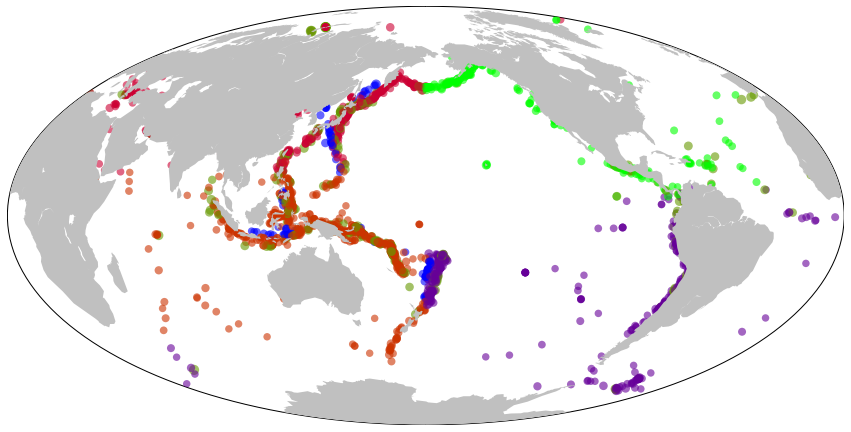

In [29]:
plt.figure(figsize=(15,10))
mapp = Basemap(projection='hammer',lon_0=180)

x, y = mapp(data_array[:,2] ,data_array[:,1])
mapp.drawmapboundary(fill_color='White')
mapp.fillcontinents(color='Silver',lake_color='White')
sp = mapp.scatter(x,y,marker='o',
          alpha=0.6,
          edgecolor='None', 
          s = 2**(data_array[:,3]),#!!!!!!!!!!параметр отвечающий за размер, кружки различаются по размерам но это почти не видно вследствие того что диапазон по шкале рихтера слишком мал
          c = model1.labels_,
          #norm = Normalize(vmin = 0.0, vmax = 1.0),
          cmap = 'brg'
          )

**Если зеленые - < 6.0 , желтые >6 но меньше 6.5 , красные >6,5 по шкале рихтера**

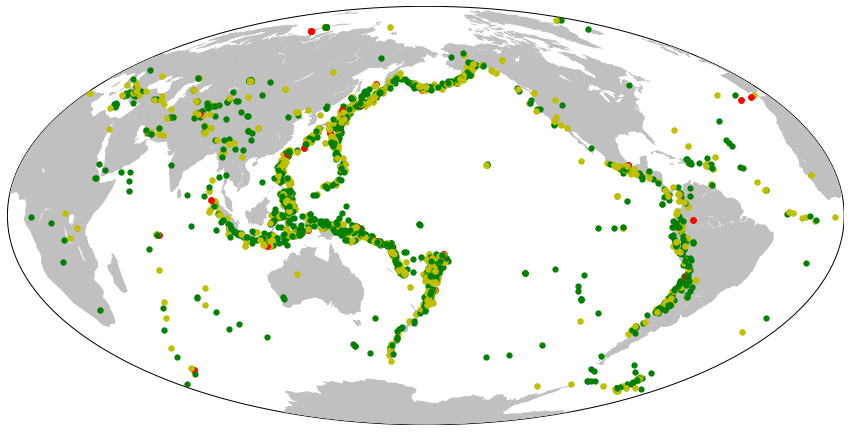

In [30]:
def get_marker_color(magnitude):
  if magnitude < 6.0:
      return ('go')
  elif magnitude < 6.5:
      return ('yo')
  else:
      return ('ro')
plt.figure(figsize=(15,10))
mapp = Basemap(projection='hammer',lon_0=180)
mapp.drawmapboundary(fill_color='White')
mapp.fillcontinents(color='Silver',lake_color='White')
min_marker_size = 0.9
for lon, lat, mag in zip(data_array[:,2], data_array[:,1], data_array[:,3]):
    x,y = mapp(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    mapp.plot(x, y, marker_string, markersize=msize)
    #mapp.plot(x, y, 'ro', markersize=msize)

In [0]:
def get_marker_color(depth):
  if magnitude < 6.0:
      return ('go')
  elif magnitude < 6.5:
      return ('yo')
  else:
      return ('ro')
plt.figure(figsize=(15,10))
mapp = Basemap(projection='hammer',lon_0=180)
mapp.drawmapboundary(fill_color='White')
mapp.fillcontinents(color='Silver',lake_color='White')
min_marker_size = 0.9
for lon, lat, mag in zip(data_array[:,2], data_array[:,1], data_array[:,3]):
    x,y = mapp(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    mapp.plot(x, y, marker_string, markersize=msize)
    #mapp.plot(x, y, 'ro', markersize=msize)

**DBSCAN**

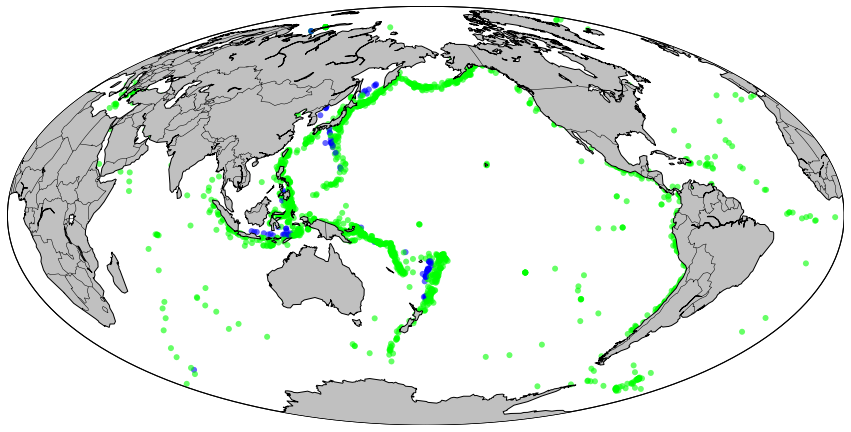

In [26]:
plt.figure(figsize=(15,10))
mapp = Basemap(projection='hammer',lon_0=180)
mapp.drawcoastlines()
mapp.drawcountries()
x, y = mapp(data_array[:,2] ,data_array[:,1])
mapp.drawmapboundary(fill_color='White')
mapp.fillcontinents(color='Silver',lake_color='White')
sp = mapp.scatter(x,y,marker='o',
          alpha=0.6,
          edgecolor='None',
          #s = 2**(data_array[:,3]),
          c = model3.labels_,
          #norm = Normalize(vmin = 0.0, vmax = 1.0),
          cmap = 'brg'
          )

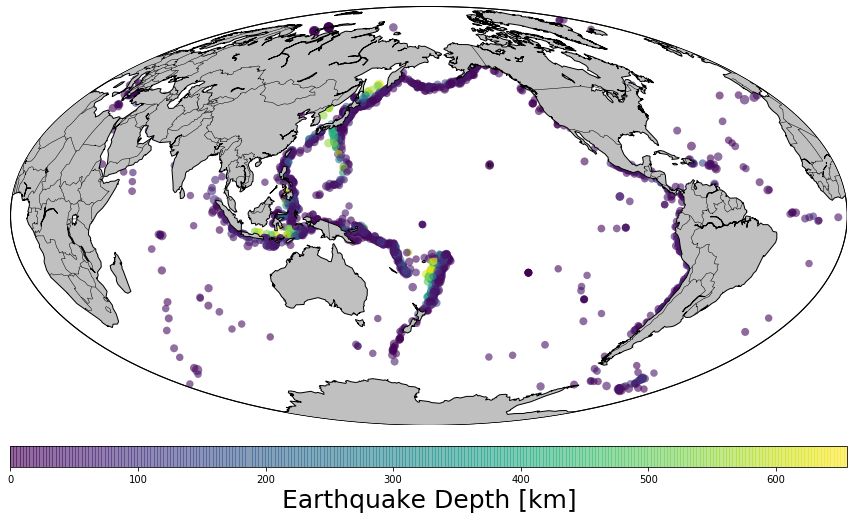

In [32]:
plt.figure(figsize=(15,10))
mapp = Basemap(projection='hammer',lon_0=180)
mapp.drawcoastlines()
mapp.drawcountries()
x, y = mapp(data_array[:,2] ,data_array[:,1])

mapp.drawmapboundary(fill_color='White')
mapp.fillcontinents(color='Silver',lake_color='White')
sp = mapp.scatter(x,y,marker='o',
          alpha=0.6,
          edgecolor='None',
          s = 2**(data_array[:,3]), #ЭТО УВЕЛИЧИВАЕТ КРУЖКИ ГДЕ ЗЕМЛЯТРЯСЕНИЯ БОЛЕЕ СИЛЬНЫЕ
          c = data_array[:,0],
          )
cb = mapp.colorbar(sp,location='bottom', pad='5%')
cb.set_label('Earthquake Depth [km]',fontsize=25)

##**Задание 6**

Интерпертация кластеризации - почему именно такие кластеры получились, что означает разделение на эти группы, что обозначает каждая группа объектов.

**ИТАК,**

**K-means распределил данные острово-континентально, то есть каждый объект большего кластера лежит с большим куском суши**

**DBSCAN решил пойти еще более легким путем и разделил на два кластера по глубине очага**

ПОВТОР результатов

**Самым быстрым оказался алгоритм DBSCAN, однако - всего 2 кластера, молниеносный,но ленивый**

**K-Means больше всего подошел для этого датасета , так как размерность признаков мала, для многоразмерных данных он бы не подошел**

**EM немного отстал от K-Means, но тоже неплохо справился**

**Hierarchy что-то сделал, но не понятно что, еще и создал много кластеров**
